<a href="https://colab.research.google.com/github/hospino/Cursos-Platzi/blob/main/ExtractVectorOSMsaveGeoJsonDrive.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

# Celda Cero: Inicialización de GEE
import ee
PROYECTO_ID = "gen-lang-client-0528470346"

try:
    # Intenta inicializar directamente con el proyecto.
    ee.Initialize(project=PROYECTO_ID)
    print("✅ Earth Engine inicializado.")

except Exception as e:
    # Si falla, es porque el token expiró. Ejecuta la autenticación de nuevo.
    print("❌ Error de inicialización. Ejecutando ee.Authenticate()...")
    ee.Authenticate()
    # Si la autenticación es exitosa, intenta inicializar de nuevo.
    ee.Initialize(project=PROYECTO_ID)
    print("✅ Autenticación y reinicialización exitosa.")

❌ Error de inicialización. Ejecutando ee.Authenticate()...
✅ Autenticación y reinicialización exitosa.


In [2]:

# Celda 1: Instalación de Librerías
!pip install osmnx geopandas matplotlib

import osmnx as ox
import geopandas as gpd
import matplotlib.pyplot as plt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.5/101.5 kB 2.9 MB/s eta 0:00:00


In [3]:

# NUEVA CELDA: Montar Google Drive

from google.colab import drive

# Este comando te pedirá autenticar tu cuenta de Google.
# Sigue el enlace que aparece y presiona 'Permitir'.
drive.mount('/content/drive')

print("✅ Google Drive montado correctamente en /content/drive")

Mounted at /content/drive
✅ Google Drive montado correctamente en /content/drive


In [6]:

# Celda 2: Extracción del Vector del Estado Mérida con OSMnx
import osmnx as ox # Aseguramos la importación si la Celda 1 se perdió
import geopandas as gpd

QUERY_NAME = "Mérida, Venezuela"

print(f"Iniciando descarga del límite para: {QUERY_NAME}...")

# 1. Descargar los límites
try:
    merida_vector = ox.geocode_to_gdf(QUERY_NAME)
except Exception:
    merida_vector = ox.features_from_place(
        place=QUERY_NAME,
        tags={"boundary": "administrative", "admin_level": "4"}
    )
    # Filtramos para obtener el polígono principal
    merida_vector = merida_vector[merida_vector.geom_type == 'MultiPolygon'].reset_index(drop=True).iloc[[0]]


if merida_vector.empty:
    print("❌ ERROR: No se encontró el límite del Estado Mérida.")
else:
    print("\n✅ Variable 'merida_vector' creada con éxito. Lista para la Celda 3.")

Iniciando descarga del límite para: Mérida, Venezuela...

✅ Variable 'merida_vector' creada con éxito. Lista para la Celda 3.



Generando mapa del Estado Mérida...


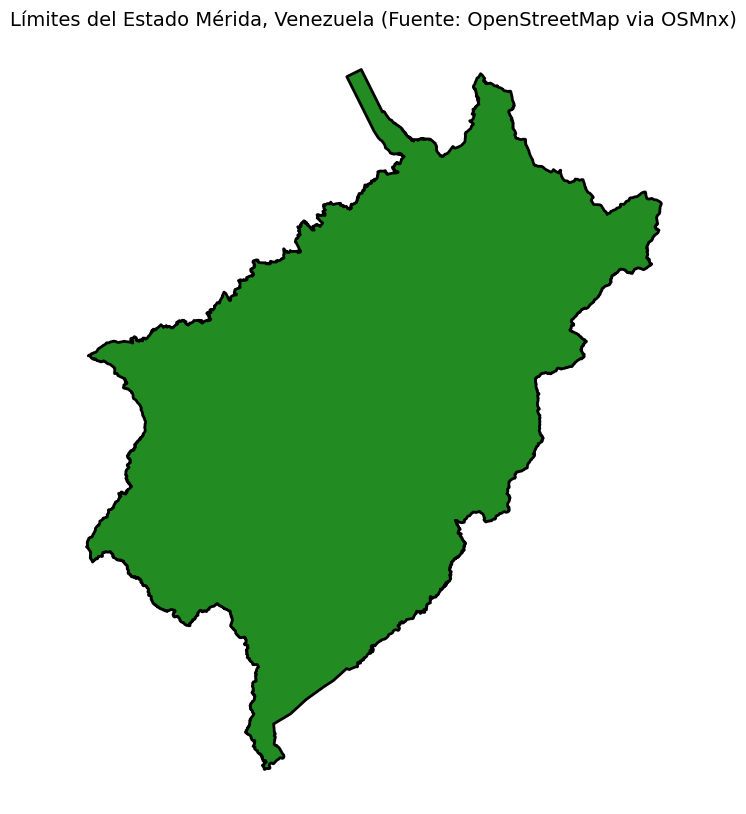


✅ Vector exportado a: merida_osm_vector.geojson
Puedes descargarlo desde el panel de archivos de Colab.


In [7]:

# Celda 3: Visualización y Exportación

# 1. Visualización del Vector
print("\nGenerando mapa del Estado Mérida...")
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
# Usamos la columna 'name' para la etiqueta en el mapa
merida_vector.plot(ax=ax, edgecolor='black', facecolor='forestgreen', linewidth=2)

# Añadir etiquetas y título
ax.set_title('Límites del Estado Mérida, Venezuela (Fuente: OpenStreetMap via OSMnx)', fontsize=14)
ax.set_axis_off()
plt.show()

# 2. Exportación a GeoJSON
output_filename = 'merida_osm_vector.geojson'
merida_vector.to_file(output_filename, driver='GeoJSON')

print(f"\n✅ Vector exportado a: {output_filename}")
print("Puedes descargarlo desde el panel de archivos de Colab.")

In [8]:

# Montar Google Drive (si quieres guardar el GeoJSON en Drive)
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).



Generando mapa del Estado Mérida...


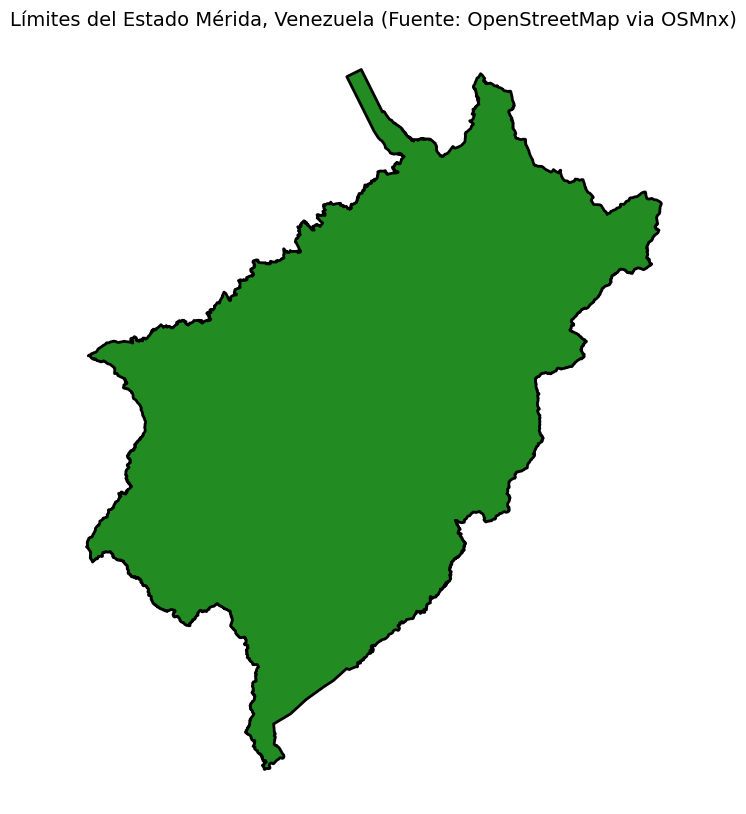

DataSourceError: Failed to create GeoJSON datasource: /content/drive/MyDrive/Proyectos_Geo/merida_osm_vector.geojson: /content/drive/MyDrive/Proyectos_Geo/merida_osm_vector.geojson: No such file or directory

In [9]:

# Celda 3: Visualización y Exportación

# 1. Visualización del Vector
print("\nGenerando mapa del Estado Mérida...")
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
merida_vector.plot(ax=ax, edgecolor='black', facecolor='forestgreen', linewidth=2)

# Añadir etiquetas y título
ax.set_title('Límites del Estado Mérida, Venezuela (Fuente: OpenStreetMap via OSMnx)', fontsize=14)
ax.set_axis_off()
plt.show()

# 2. Exportación a GeoJSON (Guarda en Drive si el paso anterior se ejecutó, o en /content/ si no)
output_path = '/content/drive/MyDrive/Proyectos_Geo/merida_osm_vector.geojson' # Cambia la ruta si no montaste Drive
merida_vector.to_file(output_path, driver='GeoJSON')

print(f"\n✅ Proyecto Completado. Vector exportado a: {output_path}")

✅ Carpeta de destino asegurada: /content/drive/MyDrive/Proyectos_Geo

Generando mapa del Estado Mérida...


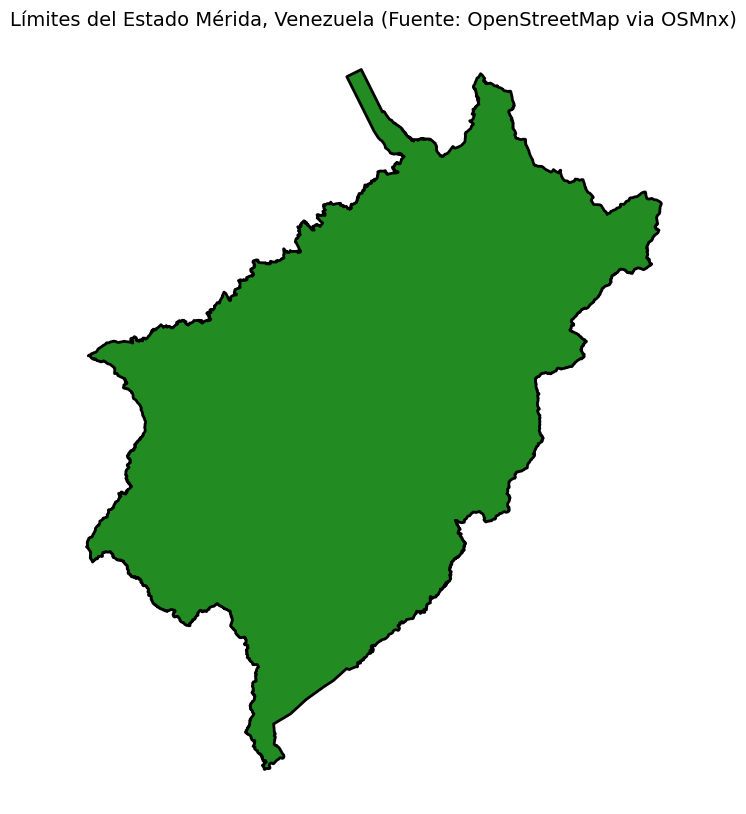


✅ Proyecto Completado. Vector exportado a Google Drive en la ruta: /content/drive/MyDrive/Proyectos_Geo/merida_osm_vector.geojson


In [10]:

# Celda 3: Visualización y Exportación

# 1. Asegurar la existencia de la carpeta de destino en Drive
import pathlib
import os

# Definimos la ruta de la carpeta
DRIVE_FOLDER = '/content/drive/MyDrive/Proyectos_Geo'

# Verificamos si la carpeta existe; si no, la creamos
# Esto es crucial para evitar el error 'No such file or directory'
pathlib.Path(DRIVE_FOLDER).mkdir(parents=True, exist_ok=True)
print(f"✅ Carpeta de destino asegurada: {DRIVE_FOLDER}")


# 2. Visualización del Vector (sin cambios)
print("\nGenerando mapa del Estado Mérida...")
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
merida_vector.plot(ax=ax, edgecolor='black', facecolor='forestgreen', linewidth=2)

ax.set_title('Límites del Estado Mérida, Venezuela (Fuente: OpenStreetMap via OSMnx)', fontsize=14)
ax.set_axis_off()
plt.show()

# 3. Exportación a GeoJSON
output_path = os.path.join(DRIVE_FOLDER, 'merida_osm_vector.geojson')

# Intentamos escribir el archivo
merida_vector.to_file(output_path, driver='GeoJSON')

print(f"\n✅ Proyecto Completado. Vector exportado a Google Drive en la ruta: {output_path}")